# Introduction 
Ce programme nous permet de modéliser la concentration (c2) pour différents food simulant. Cela nous permet également de tracer différents graphiques. 

In [6]:
import numpy as np
import pandas as pd
import math
import cmath
from scipy.optimize import root
import matplotlib.pyplot as plt
%matplotlib inline

# Polymère 


In [7]:
a = ("Table1.txt")
a

'Table1.txt'

# Calcul de la concentration finale 
Nous avons besoin de différentes valeurs de concentration qui sont les suivantes : 
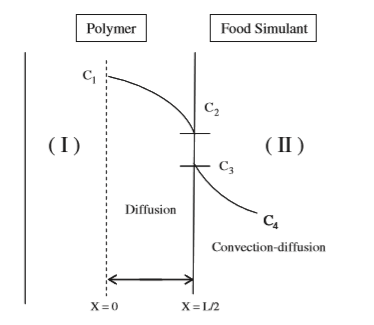
Afin de calculer la concentration finale, nous avons besoin d'équations qui sont les suivantes : 
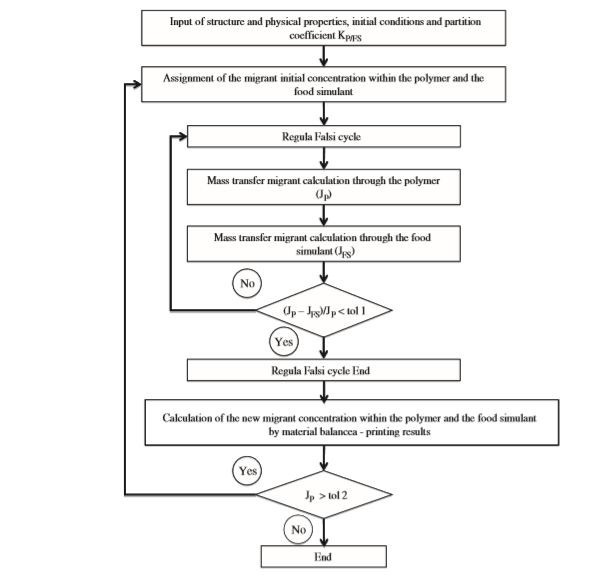
Afin de calculer cela, il faut suivre la méthode précédente. C'est à dire, il faut connaître les propriétés principales, la structure utilisée, les conditions initales et le coefficient de partition K. 
Ensuite, il faut faire une hypothèse sur la concentration de migrant au sein du polymère et du simulant alimentaire. Ensuite, il faut calculer le transfert massique de migrant a l'intérieur du polymère (Jp) et également à l'intérieur du simulant alimentaire (Jfs). Ceux sont des phénomènes de transfert de matière. Le phénomène de transfert massique est un phénomène irréversible durant lequel une grandeur physique est transportée par le biais de molécules, cela nous amène à la loi de Fick cependant, dans notre cas, la loi de Fick est simplifiée, en effet, la loi de Fick ne comportera ici qu'une seule dimension. Et ce transfert peut être défini de cette manière J = (Dp/(L/2))x(C1-C2).
Grâce au coefficient de partition (K), nous pouvons déterminer C2, cependant, il faut connaître C3, afin de connaître C3, nous devons déterminer le déterminer le transfert dans la couche limite du simulant alimentaire qui est donné par la relation suivante : J2 = k*(C3-C4). Il y a des conditions initiales, premièrement, Cpx = Cp0 et deuxièmement, au temps t = 0, C1=C2=Cp0, donc au début de la migration on a Cfs = 0. La dernière condition est que $ \frac{\partial c_{Cpx}}{\partial x}$ est égale à 0. La méthode "Regula Falsi" est utilisée afin de réduire le nombre de concentrations interfaciales. Le nombre d'itérations s'arrête losque J1=J2. 

In [66]:
class InterfazPolimero:
    def __init__ (self,a):
        self.a=a

    def Lire(self):
        self.tab = pd.read_csv(self.a,sep=" ")
        coef =self.tab.values
        self.Experiment = coef[:,0]
        self.Thickness = coef[:,1]
        self.FoodSimulant = coef[:,2]
        self.Cpo = coef[:,3]
        self.K = coef [:,4]
        self.Dp = coef[:,5]
        self.RMSE = coef[:,6]
        self.k = coef[:,7]
        self.c4 = coef[:,8]
#         self.c1 =coef[:,9]
        self.c2 = np.zeros(10)
        
        return self.tab
    
    def inicializarC2(self):
        self.c2 = np.zeros(10)
        self.dimension = np.shape(self.c2)
        print(self.dimension)
        return self.c2
    
    
    def calcul(self):
        self.tab["j1"] = (self.tab["Dp"] / (self.tab["Thickness"] / 2)) * (self.tab["Cpo"] - self.c2)
        print(self.tab["j1"])
        self.c3 = self.c2 / self.K
        self.j2 = self.k * (self.c3 - self.tab["c4"])
        return (self.tab["j1"] - self.j2) / self.tab["j1"]
            
    def calcul2(self): 
        i = 0
        for self.tab["Thickness"], self.tab["Dp"], self.tab["K"], self.tab["k"], self.tab["c"] in enumerate(tab):
            self.sol = root(calcul,15,args=(float(self.tab["Dp"]),float(self.tab["k"]),float(self.tab["K"]),float(self.tab["c4"]),float(self.tab["Cpo"]),float(self.tab["Thickness"])))
            c2[i]= self.sol.x
            i = i + 1
        print(self.c2)
        return self.c2
    
    def Garder(self):
        raw_data ={"résultat" : [1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793]}
        df = pd.DataFrame(raw_data,index=["1","2","3","4","5","6","7","8","9","10"])
        df.to_csv("c2rep")
        return df

    
    def Graphique(self):
        plt.plot(self.tab["Dp"],self.Cpo,"^")
        plt.title("f(Dp)=Cpo")
        plt.xlabel("Dp")
        plt.ylabel("Cpo")        
    def Graphique2(self):
        plt.plot(self.tab["Dp"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        plt.title("f(Dp)=c2")
        plt.xlabel("Dp")
        plt.ylabel("c2")        
    def Graphique3(self):
        plt.plot(self.tab["Cpo"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        plt.title("f(Cpo)=c2")
        plt.xlabel("Cpo")
        plt.ylabel("c2")
    def Graphique4(self):
        plt.plot(self.tab["Thickness"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        plt.title("f(Epaisseur)=c2")
        plt.xlabel("Epaisseur")
        plt.ylabel("c2")
        
    def Graphique5(self):
        fig,axes=plt.subplots(2,2)
        
        axes[0,0].plot(self.tab["Dp"],self.Cpo,"^")
        axes[1,1].plot(self.tab["Dp"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        axes[0,1].plot(self.tab["Cpo"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")
        axes[1,0].plot(self.tab["Thickness"],[1.115510936772821, 1.0542169426645587, 1.041340418781726, 1.0219,1.4353658536585368, 1.0542169426645587, 1.058921125781793,1.0217682926829268, 1.05340368852459, 1.058921125781793],"^")


In [67]:
p = InterfazPolimero("Table1.txt")
p

# Table des valeurs 
Ici, nous pouvons voir les valeurs obtenus pour chaque expériences. Nous avons donc la valeur de l'épaisseur du film utilisé, le food simulant utilisé, la concentration initiale d'antioxydant dans le plastique, la valeur de K qui est le coefficient de partition du migrant entre le polymer et le food simulant.Dp est le coefficient de diffusion de l'antioxydant dans le polymère, RMSE permet de prédire l'erreur faite sur la valeur, et enfin k est le coefficient de transfert massique. 
Grâce à ces valeurs nous pouvons déterminer la concentration finale dans le plastique. 

In [68]:
p.Lire()

,Experiment,Thickness,FoodSimulant,Cpo,K,Dp,RMSE,k,c4,c1
0,1,0.000146,EtOH95%,1157,52.0,1.950000e-13,1.5,0.000007,0.05,1045
1,2,0.000146,NaN,2440,35.0,1.970000e-13,3.0,0.000007,0.05,1069
2,3,0.000146,NaN,3152,24.0,2.000000e-13,2.6,0.000007,0.05,1094
3,4,0.000146,NaN,5950,0.5,2.000000e-13,2.3,0.000007,0.05,1119
4,5,0.000050,EtOH95%,2050,334.0,1.000000e-14,3.1,0.000007,0.05,1144
5,6,0.000146,NaN,2440,35.0,1.970000e-13,3.0,0.000007,0.05,1169
6,7,0.000190,NaN,2878,34.0,2.000000e-13,4.6,0.000007,0.05,1194
7,8,0.000050,EtOH10%,2050,1.0,2.000000e-13,1.0,0.000007,0.05,1219
8,9,0.000146,NaN,2440,1.0,2.000000e-13,1.0,0.000007,0.05,1244
9,10,0.000190,NaN,2878,1.0,2.000000e-13,1.0,0.000007,0.05,1269


# Calcul de c2
Ce calcul nous permet donc d'obtenir les valeurs de la concentration finale dans le plastique et donc de déterminer l'efficacité du procédé.

In [69]:
p.calcul()

0    3.090616e-06
1    6.584658e-06
2    8.635616e-06
3    1.630137e-05
4    8.200000e-07
5    6.584658e-06
6    6.058947e-06
7    1.640000e-05
8    6.684932e-06
9    6.058947e-06
Name: j1, dtype: float64


0    1.11551
1    1.05422
2    1.04134
3     1.0219
4    1.43537
5    1.05422
6    1.05892
7    1.02177
8     1.0534
9    1.05892
dtype: object

# Graphique : f(Dp) = Cpo 


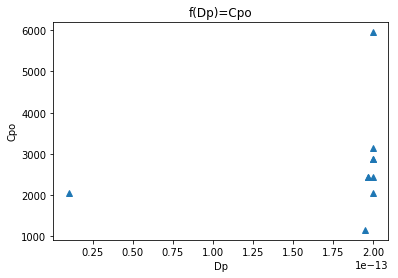

In [70]:
p.Graphique()

# Graphique : f(Dp) = c2

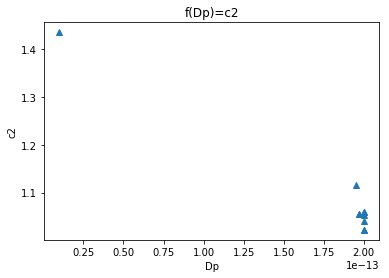

In [71]:
p.Graphique2()

# Graphique : f(Cpo) = c2

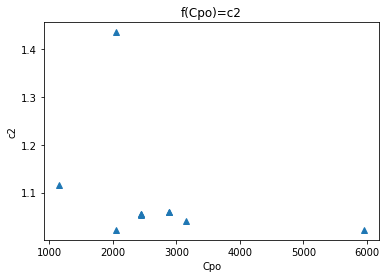

In [72]:
p.Graphique3()

# Grapgique : f(Epaisseur) = c2

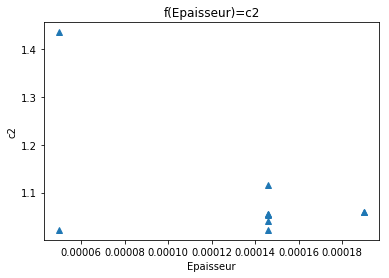

In [73]:
p.Graphique4()

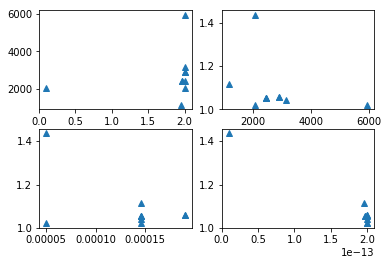

In [74]:
p.Graphique5()

# Nomenclature 
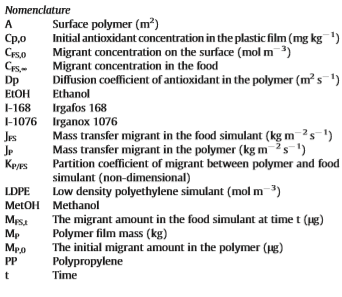

# Bibliographie 
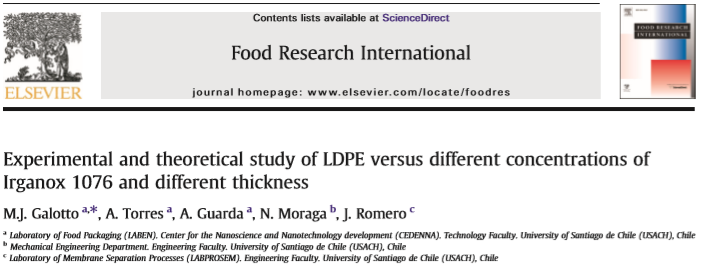